## Code here is using PRAW - the Python Reddit API Wrapper

https://praw.readthedocs.io/en/latest/index.html

In [15]:
!pip install praw

The credentials below are my own, you can create your own app here: https://www.reddit.com/prefs/apps/

In [0]:
import praw

reddit = praw.Reddit(client_id='****',
                     client_secret='****',
                     user_agent='example agent')

In [0]:
# Just picking a subreddit as an example
sub = reddit.subreddit('machinelearning')

In [0]:
top_posts = sub.top(limit=100)

In [5]:
type(top_posts)

praw.models.listing.generator.ListingGenerator

In [6]:
posts = [p for p in top_posts]
print(len(posts))

100


In [7]:
type(posts[0])

praw.models.reddit.submission.Submission

In [0]:
import pandas as pd

data = []
for post in posts:
  data.append([post.id, post.title, post.score, post.subreddit, post.url, 
               post.num_comments, post.selftext, post.created])

col_names = ['id', 'title', 'score', 'subreddit', 'url', 
             'num_comments', 'text', 'created']

df = pd.DataFrame(data, columns=col_names)

Compare to https://www.reddit.com/r/MachineLearning/top/?t=all

In [16]:
df.head(10)

,id,title,score,subreddit,url,num_comments,text,created
0,g7nfvb,[R] First Order Motion Model applied to animat...,4103,MachineLearning,https://v.redd.it/rlmmjm1q5wu41,108,,1.587818e+09
1,dh2xfs,[D] Siraj has a new paper: 'The Neural Qubit'....,2484,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,479,Exposed in this Twitter thread: https://twitte...,1.570953e+09
2,748cco,[R] Neural Color Transfer between Images,2315,MachineLearning,https://i.redd.it/1qync11pltpz.jpg,90,,1.507155e+09
3,g7wvpb,[R] Adversarial Latent Autoencoders (CVPR2020 ...,2001,MachineLearning,https://v.redd.it/0bzww3okvzu41,85,,1.587863e+09
4,8n04hp,[P] Realtime multihand pose estimation demo,1688,MachineLearning,https://media.giphy.com/media/RIX4ApOoVr5LmikK...,139,,1.527638e+09
5,68y8bb,[R] Deep Image Analogy,1668,MachineLearning,https://i.redd.it/4n1j4tvhq7vy.jpg,123,,1.493815e+09
6,g6og9l,[P] I trained a recurrent neural network train...,1628,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,124,# DICK-RNN\n\nA recurrent neural network train...,1.587684e+09
7,6l2esd,[D] Why can't you guys comment your fucking code?,1575,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,489,Seriously.\n\nI spent the last few years doing...,1.499142e+09
8,5z8110,[D] A Super Harsh Guide to Machine Learning,1507,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,252,"First, read fucking Hastie, Tibshirani, and wh...",1.489471e+09
9,92x6ll,[P] Keras Implementation of Image Outpaint,1372,MachineLearning,https://i.redd.it/gpf21unrrxc11.png,95,,1.532920e+09


In [17]:
# All text posts
print(len(df[df['text'] != '']), 'text posts')
df[df['text'] != ''].head(10)

49 text posts


,id,title,score,subreddit,url,num_comments,text,created
1,dh2xfs,[D] Siraj has a new paper: 'The Neural Qubit'....,2484,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,479,Exposed in this Twitter thread: https://twitte...,1.570953e+09
6,g6og9l,[P] I trained a recurrent neural network train...,1628,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,124,# DICK-RNN\n\nA recurrent neural network train...,1.587684e+09
7,6l2esd,[D] Why can't you guys comment your fucking code?,1575,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,489,Seriously.\n\nI spent the last few years doing...,1.499142e+09
8,5z8110,[D] A Super Harsh Guide to Machine Learning,1507,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,252,"First, read fucking Hastie, Tibshirani, and wh...",1.489471e+09
10,d7ad2y,[D] Siraj Raval - Potentially exploiting stude...,1333,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,488,"I'm not a personal follower of Siraj, but this...",1.569101e+09
13,4w6tsv,AMA: We are the Google Brain team. We'd love t...,1276,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,793,We’re a group of research scientists and engin...,1.470374e+09
15,eesoav,[N] 4 Months after Siraj was caught scamming h...,1245,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,183,This is fucking sick..\n\nPeople based in Indi...,1.577173e+09
18,ajgzoc,We are Oriol Vinyals and David Silver from Dee...,1161,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,1039,Hi there! We are Oriol Vinyals (/u/OriolVinyal...,1.548392e+09
19,bvzc7w,[D] Has anyone noticed a lot of ML research in...,1137,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,210,[https://i.imgur.com/7lCmYQt.jpg](https://i.im...,1.559523e+09
21,ex2sks,[D] Siraj is still plagiarizing,1123,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,146,Siraj's latest video on explainable computer v...,1.580572e+09


In [18]:
df.at[1, 'text']

"Exposed in this Twitter thread: https://twitter.com/AndrewM_Webb/status/1183150368945049605\n\nText, figures, tables, captions, equations (even equation numbers) are all lifted from another paper with minimal changes.\n\nSiraj's paper: http://vixra.org/pdf/1909.0060v1.pdf\n\nThe original paper: https://arxiv.org/pdf/1806.06871.pdf\n\nEdit: I've chosen to expose this publicly because he has a lot of fans and currently a lot of paying customers. They really trust this guy, and I don't think he's going to change."

In [0]:
# Save data in a CSV so we can use it later
df.to_csv('machine_learning_posts.csv')

---
## Subreddit list

downloaded the csv from here: https://www.reddit.com/r/ListOfSubreddits/comments/91j9ol/i_updated_my_csv_textspreadsheet_list_of_all/

In [5]:
import pandas as pd

sub_list = pd.read_csv('allsubreddits.csv', header=None)
sub_list.columns = ['subscribers', 'name', 'nsfw']

print(sub_list.shape)
sub_list.head()

(1130044, 3)


,subscribers,name,nsfw
0,27468441,announcements,nsfw=false
1,20091892,funny,nsfw=false
2,19663934,AskReddit,nsfw=false
3,19112908,worldnews,nsfw=false
4,19085004,todayilearned,nsfw=false


In [8]:
# Remove all nsfw subreddits
sub_list = sub_list[sub_list['nsfw'] == 'nsfw=false']
sub_list.shape

(644984, 3)

In [9]:
# Remove all subreddits with less than 100 subscribers
sub_list = sub_list[sub_list['subscribers'] > 100]
sub_list.shape

(98025, 3)

In [11]:
sub_list.head(50)

,subscribers,name,nsfw
0,27468441,announcements,nsfw=false
1,20091892,funny,nsfw=false
2,19663934,AskReddit,nsfw=false
3,19112908,worldnews,nsfw=false
4,19085004,todayilearned,nsfw=false
5,19064449,science,nsfw=false
6,19016469,pics,nsfw=false
7,18563901,gaming,nsfw=false
8,18167602,IAmA,nsfw=false
9,18090823,videos,nsfw=false


## Pulling posts from reddit

In [0]:
# additional subreddits to manually include
handpicked = ['machinelearning',
              'webdev']

# subreddits to exclude
blacklist = ['announcements',
             'blog',
             'iama']

# start with top 100 most subscribed subreddits
all_names = sub_list['name'][:100].tolist()

# add handpicked and remove blacklist
for sub in handpicked:
  all_names.append(sub)
all_names = list(filter(lambda x : x not in blacklist, all_names))

In [77]:
len(all_names)

99

In [81]:
import time

counter = 0
data = []

# for each subreddit in the top 100
for sub in all_names:
  # show progress
  print(f'{counter}: pulling data from r/{sub}')
  counter += 1

  # sleep for a few seconds to slow down requests, don't pull from API too fast
  time.sleep(5)

  # get top 1000
  post_gen = reddit.subreddit(sub).top(limit=1000)

  # for each post in the top 1000
  for post in post_gen:
    # if text is not empty
    if(post.selftext != ''):
      # append row to the data array
      data.append([post.id, post.title, post.score, post.subreddit, post.url, 
                  post.num_comments, post.selftext, post.created])
  
  # get current hot 1000
  post_gen = reddit.subreddit(sub).hot(limit=1000)

  # for each post in the top 1000
  for post in post_gen:
    # if text is not empty
    if(post.selftext != ''):
      # append row to the data array
      data.append([post.id, post.title, post.score, post.subreddit, post.url, 
                  post.num_comments, post.selftext, post.created])

# set up column names
col_names = ['id', 'title', 'score', 'subreddit', 'url', 
            'num_comments', 'text', 'created']

# save in a dataframe
df_full = pd.DataFrame(data, columns=col_names)
print(df_full.shape)

0: pulling data from r/funny
1: pulling data from r/AskReddit
2: pulling data from r/worldnews
3: pulling data from r/todayilearned
4: pulling data from r/science
5: pulling data from r/pics
6: pulling data from r/gaming
7: pulling data from r/IAmA
8: pulling data from r/videos
9: pulling data from r/movies
10: pulling data from r/aww
11: pulling data from r/Music
12: pulling data from r/gifs
13: pulling data from r/news
14: pulling data from r/explainlikeimfive
15: pulling data from r/askscience
16: pulling data from r/EarthPorn
17: pulling data from r/books
18: pulling data from r/television
19: pulling data from r/mildlyinteresting
20: pulling data from r/Showerthoughts
21: pulling data from r/LifeProTips
22: pulling data from r/space
23: pulling data from r/DIY
24: pulling data from r/Jokes
25: pulling data from r/gadgets
26: pulling data from r/nottheonion
27: pulling data from r/food
28: pulling data from r/sports
29: pulling data from r/tifu
30: pulling data from r/photoshopbatt

AttributeError: ignored

In [82]:
# I fixed the all_names list and pulled the last 2 manually

# set up column names
col_names = ['id', 'title', 'score', 'subreddit', 'url', 
            'num_comments', 'text', 'created']

# save in a dataframe
df_full = pd.DataFrame(data, columns=col_names)
print(df_full.shape)

0: pulling data from r/machinelearning
1: pulling data from r/webdev
(32301, 8)


In [84]:
# drop any duplicates (if posts were in both top and hot)
df_full = df_full.drop_duplicates()
df_full.shape

(32289, 8)

In [0]:
# the scraper pulled subreddit objects instead of str's
df_full['subreddit'] = df_full['subreddit'].astype(str)

In [89]:
# group by to show post counts
sub_count = df_full.groupby('subreddit')['id'].count().sort_values(ascending=True)

# remove any subs with less than 50 text posts scraped
sub_count = sub_count[sub_count > 50]
len(sub_count)

46

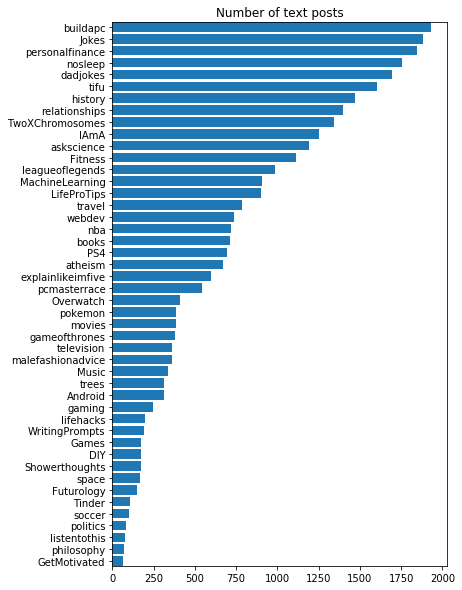

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,10))
plt.barh(y=range(len(sub_count)), width=sub_count)
plt.title('Number of text posts')
plt.yticks(ticks=range(len(sub_count)), labels=sub_count.index)
plt.margins(y=0)
plt.show()

## Trim data into just what the model will use

In [93]:
# group by to show post counts
sub_count = df_full.groupby('subreddit')['id'].count().sort_values(ascending=True)

# remove any subs with less than 100 text posts scraped
sub_count = sub_count[sub_count > 100]
len(sub_count)

42

In [94]:
sub_count.index

Index(['soccer', 'Tinder', 'Futurology', 'space', 'Showerthoughts', 'DIY',
       'Games', 'WritingPrompts', 'lifehacks', 'gaming', 'Android', 'trees',
       'Music', 'malefashionadvice', 'television', 'gameofthrones', 'movies',
       'pokemon', 'Overwatch', 'pcmasterrace', 'explainlikeimfive', 'atheism',
       'PS4', 'books', 'nba', 'webdev', 'travel', 'LifeProTips',
       'MachineLearning', 'leagueoflegends', 'Fitness', 'askscience', 'IAmA',
       'TwoXChromosomes', 'relationships', 'history', 'tifu', 'dadjokes',
       'nosleep', 'personalfinance', 'Jokes', 'buildapc'],
      dtype='object', name='subreddit')

In [201]:
df_trimmed = df_full[['title', 'text', 'subreddit']].copy()
df_trimmed.head()

,title,text,subreddit
0,COMMUNITY ANNOUNCEMENT,"In solidarity with the many communities with ""...",tattoos
1,Weekly r/Tattoos Question/FreeTalk Thread! - A...,***It's question time!***\n-------------------...,tattoos
2,Enter Shikari and Architects album artwork and...,&#x200B;\n\nhttps://preview.redd.it/gm8ri87ohm...,tattoos
3,"David Bowie Portrait - Healed, Done in April 2...",I just found this subreddit so I figured I'd s...,tattoos
4,Photo realism artist chicago,As the title suggests im looking for a good ph...,tattoos


In [202]:
df_trimmed['content'] = [''] * len(df_trimmed)

# concatenate title and text together
for i in df_trimmed.index:
  df_trimmed.at[i, 'content'] = df_trimmed.at[i, 'title'] + ' ' + df_trimmed.at[i, 'text']

df_trimmed.head()

,title,text,subreddit,content
0,COMMUNITY ANNOUNCEMENT,"In solidarity with the many communities with ""...",tattoos,COMMUNITY ANNOUNCEMENT In solidarity with the ...
1,Weekly r/Tattoos Question/FreeTalk Thread! - A...,***It's question time!***\n-------------------...,tattoos,Weekly r/Tattoos Question/FreeTalk Thread! - A...
2,Enter Shikari and Architects album artwork and...,&#x200B;\n\nhttps://preview.redd.it/gm8ri87ohm...,tattoos,Enter Shikari and Architects album artwork and...
3,"David Bowie Portrait - Healed, Done in April 2...",I just found this subreddit so I figured I'd s...,tattoos,"David Bowie Portrait - Healed, Done in April 2..."
4,Photo realism artist chicago,As the title suggests im looking for a good ph...,tattoos,Photo realism artist chicago As the title sugg...


In [203]:
# remove duplicates didn't reset the index earlier
df_trimmed = df_trimmed[['content', 'subreddit']].reset_index(drop=True)
df_trimmed.head()

,content,subreddit
0,COMMUNITY ANNOUNCEMENT In solidarity with the ...,tattoos
1,Weekly r/Tattoos Question/FreeTalk Thread! - A...,tattoos
2,Enter Shikari and Architects album artwork and...,tattoos
3,"David Bowie Portrait - Healed, Done in April 2...",tattoos
4,Photo realism artist chicago As the title sugg...,tattoos


In [0]:
# keep only posts from subreddits that have more than 100 posts
df_trimmed = df_trimmed[df_trimmed['subreddit'].isin(sub_count.index)]

In [205]:
len(df_trimmed)

32065

In [0]:
# save both versions
df_full.to_csv('reddit_data_full.csv', index=0)
df_trimmed.to_csv('reddit_data_slimmed.csv', index=0)

In [207]:
# example of reading it back in
pd.read_csv('reddit_data_slimmed.csv').head()

,content,subreddit
0,COMMUNITY ANNOUNCEMENT In solidarity with the ...,tattoos
1,Weekly r/Tattoos Question/FreeTalk Thread! - A...,tattoos
2,Enter Shikari and Architects album artwork and...,tattoos
3,"David Bowie Portrait - Healed, Done in April 2...",tattoos
4,Photo realism artist chicago As the title sugg...,tattoos


## Pulling more data

In [0]:
df_full = pd.read_csv('reddit_data_full.csv', index_col=0)

In [182]:
# get final list of 50 subs
sub_count = df_full.groupby('subreddit')['id'].count().sort_values(ascending=True)
sub_count.index[-50:]

Index(['technology', 'gadgets', 'europe', 'GifRecipes', 'GetMotivated',
       'philosophy', 'listentothis', 'politics', 'soccer', 'Tinder',
       'Futurology', 'space', 'Showerthoughts', 'DIY', 'Games',
       'WritingPrompts', 'lifehacks', 'gaming', 'Android', 'trees', 'Music',
       'malefashionadvice', 'television', 'gameofthrones', 'movies', 'pokemon',
       'Overwatch', 'pcmasterrace', 'explainlikeimfive', 'atheism', 'PS4',
       'books', 'nba', 'webdev', 'travel', 'LifeProTips', 'MachineLearning',
       'leagueoflegends', 'Fitness', 'askscience', 'IAmA', 'TwoXChromosomes',
       'relationships', 'history', 'tifu', 'dadjokes', 'nosleep',
       'personalfinance', 'Jokes', 'buildapc'],
      dtype='object', name='subreddit')

In [183]:
# manually dropping GifRecipes (near the bottom and meant for gif posts)
# then keep the top 50
sub_count = sub_count.drop('GifRecipes')[-50:]
sub_count

subreddit
tattoos                29
technology             33
gadgets                39
europe                 41
GetMotivated           64
philosophy             68
listentothis           74
politics               80
soccer                101
Tinder                108
Futurology            148
space                 169
Showerthoughts        171
DIY                   172
Games                 176
WritingPrompts        193
lifehacks             199
gaming                244
Android               311
trees                 311
Music                 338
malefashionadvice     361
television            362
gameofthrones         381
movies                386
pokemon               387
Overwatch             410
pcmasterrace          544
explainlikeimfive     596
atheism               668
PS4                   695
books                 713
nba                   721
webdev                735
travel                784
LifeProTips           898
MachineLearning       907
leagueoflegends       983
Fi

In [187]:
# re-import data, this time limiting by posts found or checked

counter = 0
data = []

# for each subreddit in the top 100
for sub in sub_count.index:
  # sleep for a few seconds to slow down requests, don't pull from API too fast
  time.sleep(5)

  top_post_gen = reddit.subreddit(sub).top(limit=2500)
  for post in top_post_gen:
    if(post.selftext != ''):
      # append row to the data array
      data.append([post.id, post.title, post.score, post.subreddit, post.url, 
                  post.num_comments, post.selftext, post.created])
      
      # stop checking for more if we've already found 2000
      posts_found += 1
      if(posts_found >= 2000):
        continue
  
  hot_post_gen = reddit.subreddit(sub).hot(limit=2500)
  for post in hot_post_gen:
    if(post.selftext != ''):
      # append row to the data array
      data.append([post.id, post.title, post.score, post.subreddit, post.url, 
                  post.num_comments, post.selftext, post.created])
      
      # stop checking for more if we've already found 2000
      posts_found += 1
      if(posts_found >= 2000):
        continue
  
  # show progress
  counter += 1
  posts_checked = top_post_gen.yielded + hot_post_gen.yielded
  print(f'{counter}: Done checking r/{sub}, checked {posts_checked} and kept {posts_found} text posts')

1: Done checking r/tattoos, checked 1599 and kept 56 text posts
2: Done checking r/technology, checked 1496 and kept 89 text posts
3: Done checking r/gadgets, checked 1298 and kept 128 text posts
4: Done checking r/europe, checked 1945 and kept 171 text posts
5: Done checking r/GetMotivated, checked 1152 and kept 235 text posts
6: Done checking r/philosophy, checked 1670 and kept 303 text posts
7: Done checking r/listentothis, checked 1362 and kept 377 text posts
8: Done checking r/politics, checked 1813 and kept 458 text posts
9: Done checking r/soccer, checked 1552 and kept 557 text posts
10: Done checking r/Tinder, checked 1722 and kept 666 text posts
11: Done checking r/Futurology, checked 1843 and kept 813 text posts
12: Done checking r/space, checked 1710 and kept 971 text posts
13: Done checking r/Showerthoughts, checked 1520 and kept 1138 text posts
14: Done checking r/DIY, checked 1284 and kept 1308 text posts
15: Done checking r/Games, checked 1554 and kept 1487 text posts
16

In [168]:
top_post_gen.yielded

882

In [188]:
# save to a dataframe
col_names = ['id', 'title', 'score', 'subreddit', 'url', 
            'num_comments', 'text', 'created']
df_full = pd.DataFrame(data, columns=col_names)

# the scraper pulls subreddit objects instead of str's
df_full['subreddit'] = df_full['subreddit'].astype(str)

# drop any duplicates (if posts were in both top and hot)
df_full = df_full.drop_duplicates()

print(df_full.shape)

(32065, 8)


In [189]:
df_full.head(10)

,id,title,score,subreddit,url,num_comments,text,created
0,flgbu4,COMMUNITY ANNOUNCEMENT,149,tattoos,https://www.reddit.com/r/tattoos/comments/flgb...,62,"In solidarity with the many communities with ""...",1.584676e+09
1,g7tdbt,Weekly r/Tattoos Question/FreeTalk Thread! - A...,2,tattoos,https://www.reddit.com/r/tattoos/comments/g7td...,11,***It's question time!***\n-------------------...,1.587849e+09
2,g6tmu5,Enter Shikari and Architects album artwork and...,8,tattoos,https://www.reddit.com/r/tattoos/comments/g6tm...,3,&#x200B;\n\nhttps://preview.redd.it/gm8ri87ohm...,1.587701e+09
3,g6dujs,"David Bowie Portrait - Healed, Done in April 2...",15,tattoos,https://www.reddit.com/r/tattoos/comments/g6du...,4,I just found this subreddit so I figured I'd s...,1.587634e+09
4,g5qikv,Photo realism artist chicago,2,tattoos,https://www.reddit.com/r/tattoos/comments/g5qi...,4,As the title suggests im looking for a good ph...,1.587542e+09
5,g4dh76,Can you do colorful Japanese/Yakuza tattoos on...,10,tattoos,https://www.reddit.com/r/tattoos/comments/g4dh...,5,I have the complexion of Rhianna and want to g...,1.587352e+09
6,g4cvty,Tattoo Commission Question. Seperate Artist an...,3,tattoos,https://www.reddit.com/r/tattoos/comments/g4cv...,11,"Hello, I've had tattoos done in the past and t...",1.587350e+09
7,g3ncyx,Weekly r/Tattoos Question/FreeTalk Thread! - A...,8,tattoos,https://www.reddit.com/r/tattoos/comments/g3nc...,52,***It's question time!***\n-------------------...,1.587245e+09
8,g1q1u7,Partial cover up / adding to a design with a d...,2,tattoos,https://www.reddit.com/r/tattoos/comments/g1q1...,9,Hi all\n\nI got my first tattoo a few weeks ag...,1.586978e+09
9,g1h123,"Lately I realized, that very famous people, ha...",12,tattoos,https://www.reddit.com/r/tattoos/comments/g1h1...,6,"Hello, new in this subreddit.\n\nIDK whether d...",1.586938e+09


In [193]:
# same results as the first time
df_full.groupby('subreddit')['id'].count().sort_values(ascending=False)

subreddit
buildapc             1932
Jokes                1872
personalfinance      1835
nosleep              1758
dadjokes             1701
tifu                 1603
history              1470
relationships        1398
TwoXChromosomes      1344
IAmA                 1254
askscience           1194
Fitness              1111
leagueoflegends       988
MachineLearning       908
LifeProTips           897
travel                784
webdev                740
nba                   727
books                 718
PS4                   692
atheism               669
explainlikeimfive     594
pcmasterrace          518
Overwatch             413
movies                390
pokemon               383
gameofthrones         380
television            365
malefashionadvice     360
Music                 341
trees                 316
Android               313
gaming                247
lifehacks             200
WritingPrompts        191
Games                 179
DIY                   170
Showerthoughts        167
sp

In [214]:
df_full['subreddit'].value_counts(normalize=True)

buildapc             0.060253
Jokes                0.058381
personalfinance      0.057228
nosleep              0.054826
dadjokes             0.053048
tifu                 0.049992
history              0.045844
relationships        0.043599
TwoXChromosomes      0.041915
IAmA                 0.039108
askscience           0.037237
Fitness              0.034648
leagueoflegends      0.030812
MachineLearning      0.028317
LifeProTips          0.027974
travel               0.024450
webdev               0.023078
nba                  0.022673
books                0.022392
PS4                  0.021581
atheism              0.020864
explainlikeimfive    0.018525
pcmasterrace         0.016155
Overwatch            0.012880
movies               0.012163
pokemon              0.011944
gameofthrones        0.011851
television           0.011383
malefashionadvice    0.011227
Music                0.010635
trees                0.009855
Android              0.009761
gaming               0.007703
lifehacks 

In [200]:
df_full[df_full['subreddit'] == 'malefashionadvice'].head(10)

,id,title,score,subreddit,url,num_comments,text,created
3069,ab31jf,I got sick of trying to find shirts that fit p...,18475,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,519,"Despite what you might think, learning how to ...",1.546255e+09
3070,7h7m28,A subreddit that is called “male fashion advic...,9500,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,674,I get that there are questions that can be ask...,1.512303e+09
3071,54xu2h,Can I get an ID on Admiral Ackbar's sneakers?,5931,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,304,http://imgur.com/HPDki9a,1.475116e+09
3072,5krwax,Things you *probably* shouldn't wear.,5101,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,2196,*I polled around a little a while back on /r/m...,1.482980e+09
3073,86zq7l,My ultimate picks for most compliment getting ...,4418,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,636,**A word before**\n\nThis is my 2nd fragrance ...,1.521999e+09
3074,abngdv,It's SO DOPE that you guys want to learn how t...,4403,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,246,I didn't expect that tailoring thread to be su...,1.546415e+09
3075,6ji2iz,What to wear for a first date? (I'm 15),4311,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,142,Hello everyone it's Dylan again. I've been wel...,1.498468e+09
3076,97tcdd,Ode to the suspected fellow MFA reader,4132,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,156,"I spot you walking to the office,\n\nI see you...",1.534463e+09
3077,3zx3k8,"Would anyone be interested in a ""sewing for gu...",3980,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,637,"Hello all,\n\nI'm thinking of starting a blog ...",1.452224e+09
3078,5ehsxf,Posture is a huge part of how you look in clot...,3969,malefashionadvice,https://www.reddit.com/r/malefashionadvice/com...,253,"Hey MFA, \n\nThis has been running through my ...",1.479943e+09


In [210]:
df_full['subreddit'].value_counts().index

Index(['buildapc', 'Jokes', 'personalfinance', 'nosleep', 'dadjokes', 'tifu',
       'history', 'relationships', 'TwoXChromosomes', 'IAmA', 'askscience',
       'Fitness', 'leagueoflegends', 'MachineLearning', 'LifeProTips',
       'travel', 'webdev', 'nba', 'books', 'PS4', 'atheism',
       'explainlikeimfive', 'pcmasterrace', 'Overwatch', 'movies', 'pokemon',
       'gameofthrones', 'television', 'malefashionadvice', 'Music', 'trees',
       'Android', 'gaming', 'lifehacks', 'WritingPrompts', 'Games', 'DIY',
       'Showerthoughts', 'space', 'Futurology', 'Tinder', 'soccer', 'politics',
       'listentothis', 'philosophy', 'GetMotivated', 'europe', 'gadgets',
       'technology', 'tattoos'],
      dtype='object')

In [211]:
df_full[df_full['subreddit'] == 'pcmasterrace']

,id,title,score,subreddit,url,num_comments,text,created
5360,7dkmk6,If you people would get even half as mad over ...,94414,pcmasterrace,https://www.reddit.com/r/pcmasterrace/comments...,2834,Just wait until NN is killed and Comcast lower...,1.510951e+09
5361,drup5a,Bought defective Razer Blade - they banned me ...,30489,pcmasterrace,https://www.reddit.com/r/pcmasterrace/comments...,2251,**We all make mistakes and occasional bad judg...,1.572960e+09
5362,5ysmza,Why's it so hard to be banned from a console s...,29237,pcmasterrace,https://www.reddit.com/r/pcmasterrace/comments...,736,They don't have any mods.,1.489268e+09
5363,62zrwf,Still waiting to receive my prize after 7 mont...,28882,pcmasterrace,https://www.reddit.com/r/pcmasterrace/comments...,1074,"Hi everyone, I am posting here as I need some ...",1.491171e+09
5364,7c75cc,My pc is working fine,28874,pcmasterrace,https://www.reddit.com/r/pcmasterrace/comments...,1056,i see only people saying saying their pc is ha...,1.510414e+09
...,...,...,...,...,...,...,...,...
5873,g8qolw,2080 Super won’t output splash screen or bios ...,2,pcmasterrace,https://www.reddit.com/r/pcmasterrace/comments...,14,Pretty much the title. Swapped out 1080ti for ...,1.587979e+09
5874,g8txgt,Looking for a decent 1440p/144Hz gaming monito...,1,pcmasterrace,https://www.reddit.com/r/pcmasterrace/comments...,8,I'm getting a new graphics card soon and I wan...,1.587992e+09
5875,g8qlco,At what point do you need liquid cooling?,2,pcmasterrace,https://www.reddit.com/r/pcmasterrace/comments...,13,Going to build a gaming/streaming rig in a few...,1.587978e+09
5876,g8tvzh,Which 140mm intake can?,1,pcmasterrace,https://www.reddit.com/r/pcmasterrace/comments...,4,I’m have a Phantek eclipse p300 and am wanting...,1.587992e+09
